In [1]:
import pandas as pd

In [2]:
stock_data = pd.read_csv('../../selenium/yohan/crawling/get_stock.hancom.csv')
stock_data

,_id,date,end_price,daily_change,start_price,high_price,low_price,trade
0,660cc0676ca5177d63a4196e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,660cc0676ca5177d63a4196f,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,660cc0676ca5177d63a41970,2024.04.03,20650.0,-300,20700.0,20750.0,20450.0,218197.0
3,660cc0686ca5177d63a41971,2024.04.02,20950.0,"-1,000",22000.0,22200.0,20800.0,552331.0
4,660cc0686ca5177d63a41972,2024.04.01,21950.0,+750,21200.0,22050.0,21200.0,421251.0
...,...,...,...,...,...,...,...,...
2463,660cc1c66ca5177d63a4230d,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,660cc1c76ca5177d63a4230e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2465,660cc1c86ca5177d63a4230f,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2466,660cc1c86ca5177d63a42310,2018.01.02,17850.0,-100,17800.0,18000.0,17700.0,54415.0


- 수집 데이터 크롤링에 Null값이 들어갈 것으로 예상하였고 실제로 맨 위 2개 항목, 5개마다 3개씩의 null값 row가 생성되었다

## 데이터 전처리

In [3]:
# 빈값 숫자 확인
stock_data.isnull().sum()

_id               0
date            926
end_price       926
daily_change    928
start_price     926
high_price      926
low_price       926
trade           926
dtype: int64

- 가격 비에서 다른 예상했던 null값보다 2개가 더 많이 잡혔다.

In [4]:
# 값 확인
stock_data.query('daily_change.isnull() & date.notnull()')

,_id,date,end_price,daily_change,start_price,high_price,low_price,trade
94,660cc0746ca5177d63a419cc,2024.01.08,19460.0,NaN,15210.0,19460.0,15090.0,16399380.0
939,660cc0ec6ca5177d63a41d19,2021.11.17,28400.0,NaN,22400.0,28400.0,21850.0,8980888.0


- 확인 결과, 94번, 939번 row의 시가와 종가의 차이가 매우 큰 row들의 값이 비었다.
- 수집할 때 상승, 하락으로만 계산하여 처리하였는데 아마도 내용 중 매우 큰 상승, 매우 큰 하락이 더 있었던 것으로 예상된다.
- 이 두 항목은 필요한 항목이기 때문에 처리한다.

In [5]:
edit_list = [94,939]

for i in edit_list:
    # 전일비 계산
    cal = stock_data.loc[i,'end_price'] - stock_data.loc[i,'start_price']
    modify = ''
    if cal > 0:
        modify = '+' + str(cal)
    elif cal < 0:
        modify = '-' + str(cal)
    else:
        modify = '0'
    stock_data.loc[i,'daily_change'] = modify

In [6]:
# 다시 null값을 확인해본다.
stock_data.isnull().sum()

_id               0
date            926
end_price       926
daily_change    926
start_price     926
high_price      926
low_price       926
trade           926
dtype: int64

- 혹시 모르니까 null값이 모두 같은 곳에 들어갔는지 더블 체크해본다.

In [7]:
check_data = stock_data[stock_data.isnull().any(axis=1)]
check_data

,_id,date,end_price,daily_change,start_price,high_price,low_price,trade
0,660cc0676ca5177d63a4196e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,660cc0676ca5177d63a4196f,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,660cc0686ca5177d63a41975,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,660cc0686ca5177d63a41976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,660cc0686ca5177d63a41977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2456,660cc1c66ca5177d63a42306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2457,660cc1c66ca5177d63a42307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,660cc1c66ca5177d63a4230d,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,660cc1c76ca5177d63a4230e,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 총 926개 rows로 예상했던 결과가 맞으므로 모두 삭제해준다.

In [8]:
# 데이터 수집시 발생한 null값 모두 drop
stock_data = stock_data.dropna()
stock_data.isnull().sum()

_id             0
date            0
end_price       0
daily_change    0
start_price     0
high_price      0
low_price       0
trade           0
dtype: int64

In [9]:
stock_data

,_id,date,end_price,daily_change,start_price,high_price,low_price,trade
2,660cc0676ca5177d63a41970,2024.04.03,20650.0,-300,20700.0,20750.0,20450.0,218197.0
3,660cc0686ca5177d63a41971,2024.04.02,20950.0,"-1,000",22000.0,22200.0,20800.0,552331.0
4,660cc0686ca5177d63a41972,2024.04.01,21950.0,+750,21200.0,22050.0,21200.0,421251.0
5,660cc0686ca5177d63a41973,2024.03.29,21200.0,-350,21600.0,22050.0,21050.0,489268.0
6,660cc0686ca5177d63a41974,2024.03.28,21550.0,-750,22200.0,22300.0,21250.0,690655.0
...,...,...,...,...,...,...,...,...
2460,660cc1c66ca5177d63a4230a,2018.01.05,17350.0,+150,17200.0,17400.0,17200.0,92601.0
2461,660cc1c66ca5177d63a4230b,2018.01.04,17200.0,-150,17450.0,17450.0,17200.0,143493.0
2462,660cc1c66ca5177d63a4230c,2018.01.03,17350.0,-500,17800.0,17850.0,17250.0,139600.0
2466,660cc1c86ca5177d63a42310,2018.01.02,17850.0,-100,17800.0,18000.0,17700.0,54415.0


- 총 1542일분의 주식 데이터를 획득하였다.

- 우선 주식 데이터가 잘 가져와졌는지 종가를 기준으로 그래프를 그려보자
- 현재 데이터가 최신값부터 정렬되어 있어 그래프를 그렸을때 익숙한 그래프의 역방향으로 나타날 것이다.
- 이를 위해 데이터를 날짜 기준으로 재정렬해준다.

In [10]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data = stock_data.sort_values('date')
stock_data[:10]


C:\Users\서울디지털인재개발원\AppData\Local\Temp\ipykernel_17360\824257486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['date'] = pd.to_datetime(stock_data['date'])


,_id,date,end_price,daily_change,start_price,high_price,low_price,trade
2467,660cc1c86ca5177d63a42311,2017-12-28,17950.0,0,18200.0,18250.0,17700.0,101160.0
2466,660cc1c86ca5177d63a42310,2018-01-02,17850.0,-100,17800.0,18000.0,17700.0,54415.0
2462,660cc1c66ca5177d63a4230c,2018-01-03,17350.0,-500,17800.0,17850.0,17250.0,139600.0
2461,660cc1c66ca5177d63a4230b,2018-01-04,17200.0,-150,17450.0,17450.0,17200.0,143493.0
2460,660cc1c66ca5177d63a4230a,2018-01-05,17350.0,+150,17200.0,17400.0,17200.0,92601.0
2459,660cc1c66ca5177d63a42309,2018-01-08,17650.0,+300,17300.0,17700.0,17100.0,147136.0
2458,660cc1c66ca5177d63a42308,2018-01-09,17050.0,-600,17600.0,17700.0,17050.0,163209.0
2454,660cc1c66ca5177d63a42304,2018-01-10,17250.0,+200,17150.0,17250.0,17000.0,94785.0
2453,660cc1c66ca5177d63a42303,2018-01-11,17350.0,+100,17100.0,17450.0,17100.0,77772.0
2452,660cc1c66ca5177d63a42302,2018-01-12,17200.0,-150,17350.0,17400.0,16850.0,141607.0


In [11]:
import seaborn as sns

<Axes: xlabel='date', ylabel='end_price'>

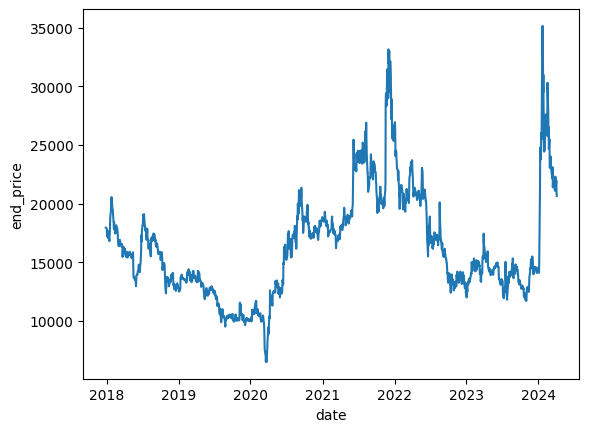

In [12]:
sns.lineplot(x=stock_data['date'], y=stock_data['end_price'])

- 값의 등락을 조금 더 심플하게 확인하기 위해 등락비를 기준으로 상승,하락,유지에 대한 테이블을 따로 확인하여본다

In [13]:
high = 0
low = 0
notchange = 0

for i in stock_data['daily_change']:
    if '-' in i:
        low += 1
    elif '+' in i:
        high += 1
    else:
        notchange +=1

print(high,low,notchange)

675 756 111


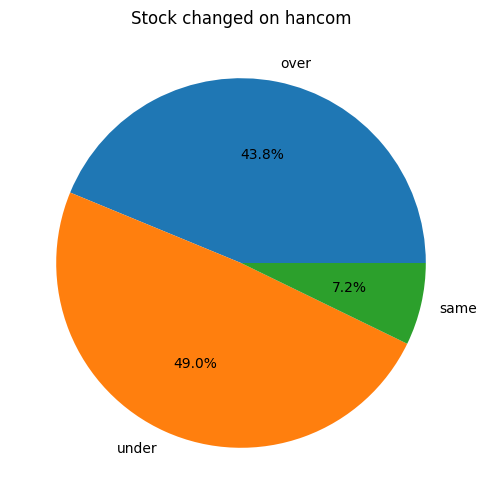

In [14]:
import matplotlib.pyplot as plt

Category = ['over', 'under', 'same']
Value = [high, low, notchange]

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(Value, labels=Category, autopct='%1.1f%%')
plt.title('Stock changed on hancom')
plt.show()

- 단위 기간 내 전일비는 약 49%가 하락하였고, 약 44% 상승, 약 7%는 변동이 없었다.
- 주식가는 기간내 우상향 하였으므로 전체적으로 하락폭에 대한 가격방어가 좋았으며 상승폭에 대한 가격상승이 높았다고 볼 수 있다.

## 분석 전략
- 전일비 절대값이 전일 종가의 5% 이상이라면 가격에 대해 외부요인이 작용하였다고 가정한다.
- 거래량이 전일 거래량 대비 50%이상 차이가 난다면 가격에 대해 외부요인이 작용하였다고 가정한다.

- 두 가정에 대해 외부요인이 작용한 구간을 구하고, 그 구간내 뉴스 토픽을 분석한다.
    + 구간 내 뉴스에 대한 유의미한 상관관계가 있다고 판단되면, 의미 있는 토픽과 단어를 분석한다

In [15]:
stock_data

,_id,date,end_price,daily_change,start_price,high_price,low_price,trade
2467,660cc1c86ca5177d63a42311,2017-12-28,17950.0,0,18200.0,18250.0,17700.0,101160.0
2466,660cc1c86ca5177d63a42310,2018-01-02,17850.0,-100,17800.0,18000.0,17700.0,54415.0
2462,660cc1c66ca5177d63a4230c,2018-01-03,17350.0,-500,17800.0,17850.0,17250.0,139600.0
2461,660cc1c66ca5177d63a4230b,2018-01-04,17200.0,-150,17450.0,17450.0,17200.0,143493.0
2460,660cc1c66ca5177d63a4230a,2018-01-05,17350.0,+150,17200.0,17400.0,17200.0,92601.0
...,...,...,...,...,...,...,...,...
6,660cc0686ca5177d63a41974,2024-03-28,21550.0,-750,22200.0,22300.0,21250.0,690655.0
5,660cc0686ca5177d63a41973,2024-03-29,21200.0,-350,21600.0,22050.0,21050.0,489268.0
4,660cc0686ca5177d63a41972,2024-04-01,21950.0,+750,21200.0,22050.0,21200.0,421251.0
3,660cc0686ca5177d63a41971,2024-04-02,20950.0,"-1,000",22000.0,22200.0,20800.0,552331.0


In [16]:
setting_dict = {
    'price' : 0.05,
    'trade' : 0.5
}
from tqdm import tqdm

def check_point(setting_dict,target,data_list):
    overrate = setting_dict.get(target,False)
    data_list = data_list.tolist()
    check_list = []
    for i in tqdm(range(len(data_list))):
        # 전날과 비교할 수 없는 1번재 날 제외
        if i == 0:
            check_list.append(False)
        else:
            rate = abs((data_list[i-1] - data_list[i])/data_list[i])
            if rate >= overrate:
                check_list.append(True)
            else:
                check_list.append(False)
        
    return check_list    

In [17]:
stock_data['trade']

2467    101160.0
2466     54415.0
2462    139600.0
2461    143493.0
2460     92601.0
          ...   
6       690655.0
5       489268.0
4       421251.0
3       552331.0
2       218197.0
Name: trade, Length: 1542, dtype: float64

In [18]:
target = 'trade'
get_list = check_point(setting_dict,target,stock_data['trade'])
len(get_list)

100%|██████████| 1542/1542 [00:00<00:00, 1544321.10it/s]


1542

In [19]:
stock_data['trade_checkpoint'] = get_list

In [20]:
target = 'price'
get_list = check_point(setting_dict,target,stock_data['end_price'])

100%|██████████| 1542/1542 [00:00<00:00, 771791.98it/s]


In [21]:
stock_data['price_checkpoint'] = get_list

In [22]:
stock_data

,_id,date,end_price,daily_change,start_price,high_price,low_price,trade,trade_checkpoint,price_checkpoint
2467,660cc1c86ca5177d63a42311,2017-12-28,17950.0,0,18200.0,18250.0,17700.0,101160.0,False,False
2466,660cc1c86ca5177d63a42310,2018-01-02,17850.0,-100,17800.0,18000.0,17700.0,54415.0,True,False
2462,660cc1c66ca5177d63a4230c,2018-01-03,17350.0,-500,17800.0,17850.0,17250.0,139600.0,True,False
2461,660cc1c66ca5177d63a4230b,2018-01-04,17200.0,-150,17450.0,17450.0,17200.0,143493.0,False,False
2460,660cc1c66ca5177d63a4230a,2018-01-05,17350.0,+150,17200.0,17400.0,17200.0,92601.0,True,False
...,...,...,...,...,...,...,...,...,...,...
6,660cc0686ca5177d63a41974,2024-03-28,21550.0,-750,22200.0,22300.0,21250.0,690655.0,False,False
5,660cc0686ca5177d63a41973,2024-03-29,21200.0,-350,21600.0,22050.0,21050.0,489268.0,False,False
4,660cc0686ca5177d63a41972,2024-04-01,21950.0,+750,21200.0,22050.0,21200.0,421251.0,False,False
3,660cc0686ca5177d63a41971,2024-04-02,20950.0,"-1,000",22000.0,22200.0,20800.0,552331.0,False,False


In [23]:
stock_data['price_checkpoint'].value_counts()

price_checkpoint
False    1417
True      125
Name: count, dtype: int64

In [24]:
stock_data['trade_checkpoint'].value_counts()

trade_checkpoint
False    1032
True      510
Name: count, dtype: int64

In [25]:
stock_data['trade_checkpoint']

2467    False
2466     True
2462     True
2461    False
2460     True
        ...  
6       False
5       False
4       False
3       False
2        True
Name: trade_checkpoint, Length: 1542, dtype: bool

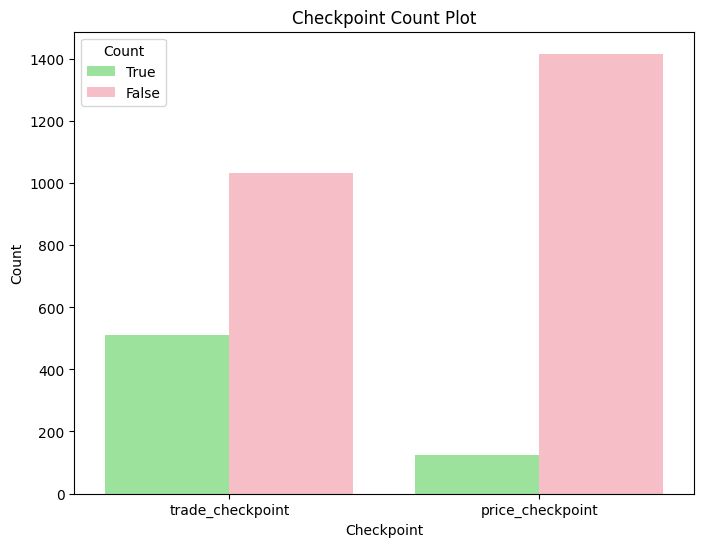

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
melted_data = stock_data[['trade_checkpoint','price_checkpoint']].melt(var_name='Checkpoint', value_name='Count')
sns.countplot(data=melted_data, palette=['lightgreen', 'lightpink'], x='Checkpoint', hue='Count', hue_order=[True, False])
plt.title('Checkpoint Count Plot')
plt.xlabel('Checkpoint')
plt.ylabel('Count')
plt.show()


In [50]:
stock_data.columns

Index(['_id', 'date', 'end_price', 'daily_change', 'start_price', 'high_price',
       'low_price', 'trade', 'trade_checkpoint', 'price_checkpoint'],
      dtype='object')

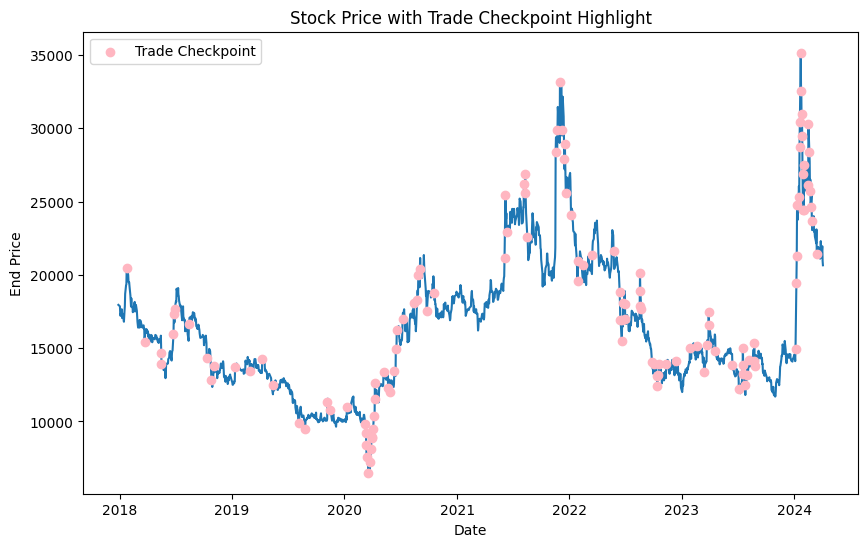

In [58]:
# 데이터프레임의 trade_checkpoint 열 값이 True인 행을 필터링하여 해당 날짜를 가져옵니다.
highlight_dates = stock_data.loc[stock_data['price_checkpoint'], 'date']

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 주가 라인 플롯
sns.lineplot(data=stock_data, x='date', y='end_price')

# 특정 날짜에 점으로 표시
plt.scatter(x=highlight_dates, y=stock_data.loc[stock_data['date'].isin(highlight_dates), 'end_price'], color='lightpink', label='Trade Checkpoint', zorder=5)

plt.title('Stock Price with Trade Checkpoint Highlight')
plt.xlabel('Date')
plt.ylabel('End Price')
plt.legend()
plt.show()